In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

sns.set_style('darkgrid')
matplotlib.rcParams.update({'figure.figsize':(10,7),
                            'font.size': 12,
                            'figure.facecolor': '#00000000'
                            })


In [2]:
#Loading data and checking if there is any suspicious column which is not relevant to our research#
df = pd.read_csv('Cancer_Data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
#Notice that column id has no relavant information#
#Detect if columnn 'Unnamed: 32' has other values than NaN#
df['Unnamed: 32'].nunique()

0

In [4]:
#In column 'Unnamed: 32', there are no other values than NaN#
#Therefor, we will drop columns 'id' and 'Unnamed: 32'#
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)

In [5]:
df.columns #Checking columns of DataFrame#

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
inputs = df.iloc[:, 1:] #Creating DataFrame named 'inputs' that contains data which we use as input in creation of test#
targets = df.diagnosis #Creating DataFrame named 'targets' that contains data which we use as input in creation of test#

In [7]:
#Checking what is the ration between Bening and Malignant diagnosis#
figure_diagnosis = px.pie(df, 'diagnosis', title='Benign | Malignant')
figure_diagnosis.show()

In [8]:
#Defining helper function which we use to plot histograms in order to determine distribution of features#
#We use keyword color = 'diagnosis' in order to see how diagnosis relates to feature we are looking on#

def distribution_check(column_name):
    figure_test = px.histogram(df,
                           x=f'{column_name}',
                           color='diagnosis',
                           title=f'Distribution of {column_name}<br>Relation between {column_name} and diagnosis',
                           nbins=50,
                           )
    figure_test.update_layout(bargap=0.15)
    figure_test.show()

We use following code to print every single histogram:

" for i in range (df.shape[1]):
      print(distribution_check(df.columns[i])) "
    
In desire to keep this notebook clean and readable, we will show just few of them:

In [9]:
#Let's se histograms of following features: texture_mean, perimeter_mean, area_mean#

distribution_check(df.columns[2])
distribution_check(df.columns[3])
distribution_check(df.columns[4])

As we can see from histograms above, with higher values of features it's more likely for diagnosis to be "Malignant" and vice-versa. Lower values of features corresponds to diagnosis being "Benign".

For example: perimeter_worst graeter than 130 almost surely guarantees that diagnosis is going to be "Malignant";
             concave_points_mean greater than 0.1 almost surely guarantees that diagnosis is going to be "Malignant;
             radius_worst less than 12 almost surely guarantees that diagnosis is going to be "Benign".

Based on histograms, we can also see that those features have either Gaussian or T distribution.

In [10]:
#Let's se histograms of following features: perimeter_se and area_se#

distribution_check(df.columns[13])
distribution_check(df.columns[14])

Again, we can notice that higher values of features (perimeter_se, area_se) corresponds to greater possibility of diagnosis being "Malignant" and vice-versa.

Distribution is somewhat close to Exponential distribution.


In [11]:
#Let's check if there is relation between different features#
#For example, let's observe features 'radius_worst' and 'perimeter_worst'#

figure1 = px.scatter(df,
                     x = 'radius_worst',
                     y = 'perimeter_worst',
                     color = 'diagnosis',
                     )
figure1.show()

From the graph shown above we can see there's just one cluster. We can also notice a positive linear relation between 'perimeter_worst' and 'radius_worst'. 
We can visualize relations between other features as well.

However, the most important thing is how features relate to diagnosis. In order to establish that, we are going to use method 'linear correlation'. That will give us numerical connection between features and diagnosis.

In [12]:
#We are going to use df.info() method in order to see if there's any missing or NaN values#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Fortunately, we have 30 numerical values and just 1 object (values in column 'diagnosis'). Also, there's no missing (or NaN) values. 
Therefore, we can tell that the data is really well structured.

If there were some categorical columns, we would transform them into numerical ones, using (for example) class OneHotEncoder from sklearn.preprocessing.

If there were some missing values, we would fill those element using (for example) SimpleImputer class from sklearn.imputer.

In [13]:
#Let's transform values from diagnosis column into numerical (binary) ones#

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df ['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

In [14]:
#Let's see correalation between diagnosis and features#
df.corrwith(df.diagnosis).sort_values(ascending=False)


diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

As we can see from the table above. features like concave points_worst, perimeter_worst, concave points_mean, radius_worst etc. have a really strong correlation with diagnosis.
Whatsoever, almost every feature has strong correlation with diagnosis (this is a strong indicator that the data is well gathered)

However, last 5 features are not in so strong correlation with diagnosis. For our purposes, let's exclude them.

WARNING: This is surely not the best idea. However, we lovered dimension by 5 (it will not help us in constracting simple model like this one, but in more complex situations, it surely will). 

While excluding some features, we had to pay attention to their absolute values, which is actually the strenght of linear correlation. Also, we needed to pay attention to sign of correlation. We could've excluded features that just have negative correlation, but that can lead us to potential error accumulation. Therefore, we excluded one feature that has positive corellation.

(Keep in mind that this should not be the rule. We are doing this only for learning purposes.)

In [15]:
#We are going to create a new (filtered) DataFrame named raw_df with above specified columns#

important_columns = df.corrwith(df.diagnosis).sort_values(ascending=False).head(-5).index.tolist()
raw_df = df[important_columns]

#Features are our inputs, diagnosis is our target#
#We want to create a model which will use features (inputs) to give prediction about diagnosis (target)#

df_inputs = raw_df.iloc[:,1:] #DataFrame containing features#
df_targets = raw_df.iloc[:,0] #DataFrame containing diagnosis#

In [16]:
input_cols = df_inputs.columns.tolist() #Creating list containing names of input columns#
target_cols = 'diagnosis' 

In the following cell [17], DataFrame raw_df will be 'randomly" splitted into 3 new DataFrames in (standard) 60-20-20 ratio.

First will be named 'train_df' and we are going to use it to train our model. (60% of raw_df)
Second will be named 'val_df' and we are going to use it to validate our model. (20% of raw_df)
Third will be named 'test_df' and we are going to use it to test our model. (20% of raw_df)

In [17]:
from sklearn.model_selection import train_test_split
train_val_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=13)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=13)

#We can play around with keyword 'test_size'#
#Naturally, we want more data to train our model, but we need to pay attention to val_size and test_size#

In [18]:
from sklearn.preprocessing import MinMaxScaler #We could try using StandardScaler instead and see if that's gonna change model#
scaler = MinMaxScaler(feature_range=(0,1)) #We pick (0,1) interval because we have no negative values#
scaler.fit(df_inputs) #Applying scaler on DataFrame constaining all of the features#

MinMaxScaler()

In [19]:
train_df[input_cols] = scaler.transform(train_df[input_cols])
val_df[input_cols] = scaler.transform(val_df[input_cols])
test_df[input_cols] = scaler.transform(test_df[input_cols])

In [20]:
train_inputs = train_df[input_cols].copy()
val_inputs = val_df[input_cols].copy()
test_inputs = test_df[input_cols].copy()

train_targets = train_df[target_cols].copy()
val_targets = val_df[target_cols].copy()
test_targets = test_df[target_cols].copy()

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression (solver='liblinear')
model.fit(train_inputs,train_targets)

LogisticRegression(solver='liblinear')

In [22]:
coef_dict = dict(zip(input_cols,model.coef_.tolist()[0]))
coef_df = pd.DataFrame([coef_dict])
coef_df #Weights of corresponding features#

,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,concavity_worst,...,texture_worst,smoothness_worst,symmetry_worst,texture_mean,concave points_se,smoothness_mean,symmetry_mean,fractal_dimension_worst,compactness_se,concavity_se
0,2.128449,1.604069,2.149509,1.651888,0.979415,1.436402,0.92388,1.12197,1.638595,1.256367,...,1.146167,0.275126,0.449786,0.573018,-0.359948,-0.512061,-0.632374,-0.172628,-0.901798,-0.522327


In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix

We are going to use accuracy_score and confusion_matrix for validation and test as well. Therefore, let's create a helper function, which will return accuracy_score and plot heatmamp of confusion matrix.

In [89]:
def predict_and_plot(targets, inputs, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(preds,targets)
    print('Accuracy: {:.2f}%'.format(accuracy*100))
    
    cm = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='Reds')
    plt.xlabel('Benign           PPREDICTION                  Malignant')
    plt.ylabel('Malignant                    TARGET         Benign')
    plt.title(f'Confusion Matrix {name}')
    plt.show()
    
    return preds

Accuracy: 95.89%


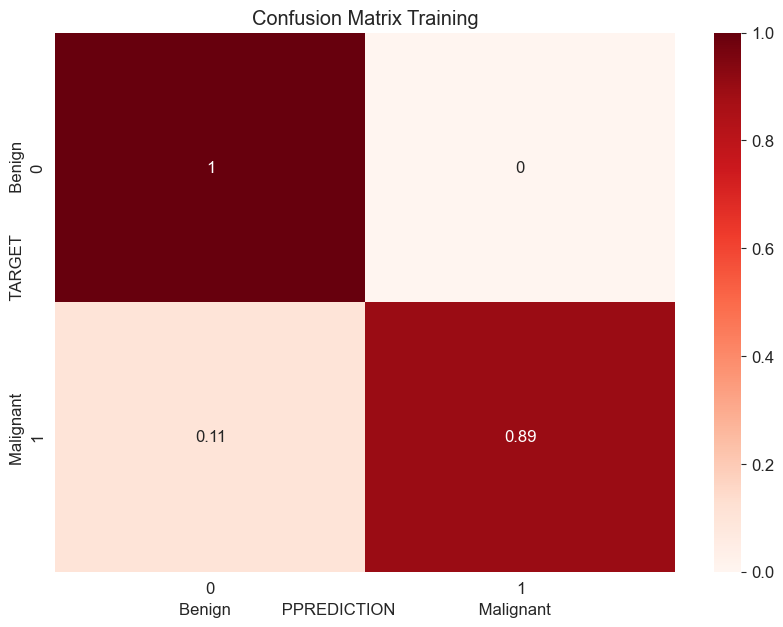

In [90]:
#This command will return training predictions and plot confusion matrix)#
train_preds = predict_and_plot(train_targets, train_inputs, 'Training')

Overall Accuracy of 95.89% is high enough. 

However, we have II type error greater than I type error. It is not good that in 1 out of 10 times, breast_cancer_detection_test is going to be false negative. 

In other words, a person would have cancer and test will show that she doesn't.

We should try changing parameters in order to decrease II type error. It's always a good idea to have more false positives than false negatives.


Accuracy: 97.37%


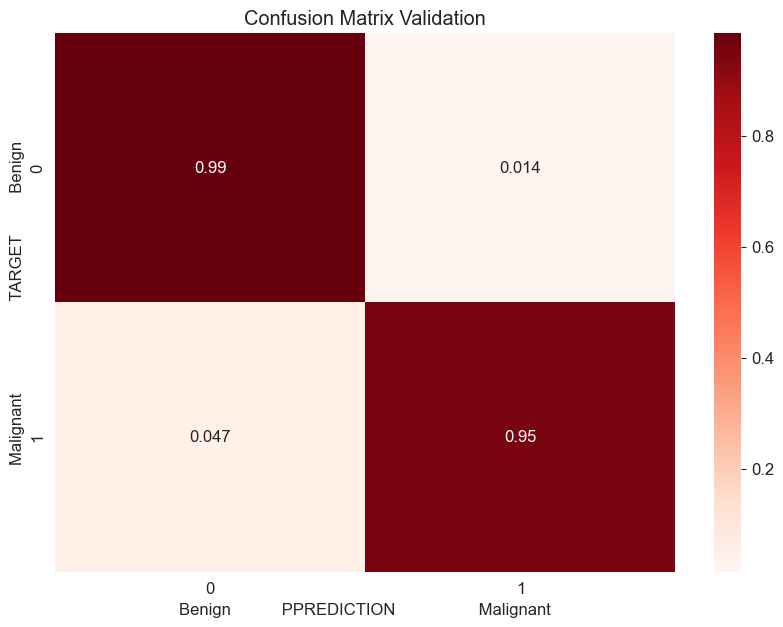

In [26]:
#This command will return validation predictions and plot confusion matrix)#
val_preds = predict_and_plot(val_targets,val_inputs, 'Validation')

Probability of II type error on validation is less than probability of II type error on train. It's a good (although can be suspicious) sign.

Accuracy: 99.12%


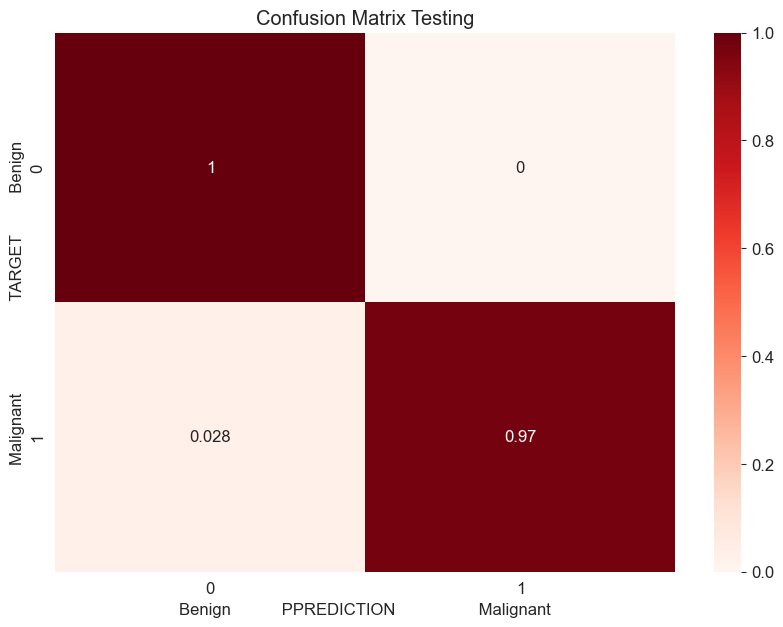

In [27]:
#This command will return testing predictions and plot confusion matrix)#
test_preds = predict_and_plot(test_targets,test_inputs, 'Testing')

Accuracy of 99.12% on Testing is greater than Accuracy on Validation and Training.

Also, probability of II type error on Testing is the smallest one (compared to Training and Validation).

Those are great (although suspicious) results. Does it mean that our model learnt during Training and Validation process?

In [84]:
#Defining a function that takes user_input (user data) as an argument and returns prediction and probability of it being benign or malignant#
def predict_input(user_input):
    user_input = {key: df_inputs.mean()[key] if pd.isna(value) else value for key, value in user_input.items()}
    input_df = pd.DataFrame([user_input])
    input_df[input_cols] = scaler.transform(input_df[input_cols])
    pred = model.predict(input_df[input_cols])[0]
    prob = model.predict_proba(input_df[input_cols])[0][list(model.classes_).index(pred)]
    return pred, prob

In [83]:
def single_row_from_data(i):
    try:
        x=df[input_cols].columns.tolist()
        y = df[input_cols].iloc[i].tolist()
        dict_srfd = dict(zip(x,y))
        print('True diagnosis is {}'.format(df.diagnosis.iloc[i]))
        return dict_srfd
    except:
        print('Please insert number less than {}'.format(df.shape[0]))

In [85]:
user_input = {'concave points_worst':'insert_value',
             'perimeter_worst':'insert_value',
             'concave points_mean':'insert_value',
             'radius_worst':'inser_value',
             'perimeter_mean':'insert_value',
             'area_worst':'insert_value',
             'radius_mean':'insert_value',
             'area_mean':'insert_value',
             'concavity_mean':'insert_value',
             'concavity_worst':'insert_value',
             'compactness_mean':'insert_value',
             'compactness_worst':'insert_value',
             'radius_se':'insert_value',
             'perimeter_se':'insert_value',
             'area_se':'insert_value',
             'texture_worst':'insert_value',
             'smoothness_worst':'insert_value',
             'symmetry_worst':'insert_value',
             'texture_mean':'insert_value',
             'concave points_se':'insert_value',
             'smoothness_mean':'insert_value',
             'symmetry_mean':'insert_value',
             'fractal_dimension_worst':'insert_value',
             'compactness_se':'insert_value',
             'concavity_se':'insert_value'}    